<a href="https://colab.research.google.com/github/edu015u/IA-Y-REDES-NEURONALES-2025/blob/main/ACTIVIDADES/AF5_Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AF5 5: Procesamiento de conjuntos de datos en Python


Integrantes:

Blas Eduardo Escobar Rodríguez 1903990 N5

Gael Guevara Puente 2049066 N5

Ana Camila Parra Aguilar 2052187 N5

Christopher Daniel  Candelario López 2001039 N5

Jonathan Gonzalez Zuñiga 2108162 N5

## Explicación de la actividad

En esta actividad se trabajará con un conjunto de datos de sensores de un robot móvil, el cual contiene información de tiempo, distancia, velocidad y temperatura.

Primero se cargará el dataset con pandas y se mostrarán las primeras filas para conocer su estructura. Posteriormente, se eliminarán los valores nulos y se realizará un filtrado para descartar datos atípicos, como por ejemplo velocidades negativas.

Después se aplicará una normalización con la técnica de Min-Max Scaling para que todas las variables numéricas queden en la misma escala y sea más sencillo compararlas. Finalmente, se usarán gráficas con matplotlib para visualizar de forma clara el comportamiento de los datos una vez procesados.

De esta manera, se pondrá en práctica el uso de Python en Google Colab y el manejo de librerías como pandas, numpy y matplotlib.


In [1]:
# Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
#Carga de dataset
df = pd.read_csv('/content/robot_sensors.csv')

In [3]:
print("¿df existe?:", 'df' in locals())


¿df existe?: True


In [4]:
#Primeras 10 líneas del dataset

print(df.head(10))

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246
5           5       24.039507         32.939168         31.390974
6           6       15.227525         34.613828         26.746098
7           7       87.955853         42.459783         31.650658
8           8       64.100351         12.483400         20.980492
9           9       73.726532         24.471248         27.313568


In [5]:
#información sobre las columnas y el tipo de datos de cada una.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None


In [6]:
(df.shape)

(1000, 4)

In [7]:
#Limpieza de datos
# Verifica si hay valores nulos (missing values) en alguna columna y cómo manejarlos.
print(df.isnull().sum())


Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


In [8]:
df['Distancia (cm)'] = df['Distancia (cm)'].fillna(df['Distancia (cm)'].mean())

In [9]:
df['Velocidad (cm/s)'] = df['Velocidad (cm/s)'].fillna(df['Velocidad (cm/s)'].mean())

In [10]:
df['Temperatura (°C)'] = df['Temperatura (°C)'].fillna(df['Temperatura (°C)'].mean())

In [11]:
#Limpieza de datos completa, ya no hay valores nulos
#Comprobación
print(df.isnull().sum())

Tiempo (s)          0
Distancia (cm)      0
Velocidad (cm/s)    0
Temperatura (°C)    0
dtype: int64


In [12]:
# Filtrado de velocidad negativa
df_grande = df[df['Velocidad (cm/s)'] >= 0]

In [13]:
# Comprobar si hay velocidades negativas
print((df['Velocidad (cm/s)'] < 0).sum())

0


In [14]:
# Calcula los valores promedios de la velocidad, distancia y temperatura.
valores_promedio = df[['Velocidad (cm/s)', 'Distancia (cm)', 'Temperatura (°C)']].mean()
print(valores_promedio)


Velocidad (cm/s)    25.203708
Distancia (cm)      54.011809
Temperatura (°C)    27.518110
dtype: float64


In [15]:
# Velocidad máxima y mínima
velocidad_max = df.loc[df['Velocidad (cm/s)'].idxmax()]
velocidad_min = df.loc[df['Velocidad (cm/s)'].idxmin()]

print("Registro con mayor velocidad:")
print(velocidad_max)
print("\nRegistro con menor velocidad:")
print(velocidad_min)

# Distancia máxima y mínima
distancia_max = df.loc[df['Distancia (cm)'].idxmax()]
distancia_min = df.loc[df['Distancia (cm)'].idxmin()]

print("\nRegistro con mayor distancia:")
print(distancia_max)
print("\nRegistro con menor distancia:")
print(distancia_min)

# Temperatura máxima y mínima
temperatura_max = df.loc[df['Temperatura (°C)'].idxmax()]
temperatura_min = df.loc[df['Temperatura (°C)'].idxmin()]

print("\nRegistro con mayor temperatura:")
print(temperatura_max)
print("\nRegistro con menor temperatura:")
print(temperatura_min)

Registro con mayor velocidad:
Tiempo (s)          464.000000
Distancia (cm)       96.595529
Velocidad (cm/s)     49.970686
Temperatura (°C)     29.309907
Name: 464, dtype: float64

Registro con menor velocidad:
Tiempo (s)          921.000000
Distancia (cm)       53.868808
Velocidad (cm/s)      0.160913
Temperatura (°C)     30.689320
Name: 921, dtype: float64

Registro con mayor distancia:
Tiempo (s)          531.000000
Distancia (cm)       99.974591
Velocidad (cm/s)     30.516689
Temperatura (°C)     32.427039
Name: 531, dtype: float64

Registro con menor distancia:
Tiempo (s)          821.000000
Distancia (cm)       10.416882
Velocidad (cm/s)      6.069321
Temperatura (°C)     23.430152
Name: 821, dtype: float64

Registro con mayor temperatura:
Tiempo (s)          529.000000
Distancia (cm)       87.825014
Velocidad (cm/s)     26.958064
Temperatura (°C)     34.967313
Name: 529, dtype: float64

Registro con menor temperatura:
Tiempo (s)          902.000000
Distancia (cm)       26.329189

In [16]:
#Normalización

columnas = ['Velocidad (cm/s)', 'Distancia (cm)', 'Temperatura (°C)']

scaler = MinMaxScaler()
df[columnas] = scaler.fit_transform(df[columnas])

print(df.head())

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0        0.371735          0.182609          0.262269
1           1        0.950755          0.540740          0.247509
2           2        0.730954          0.873049          0.908233
3           3        0.596960          0.731791          0.250082
4           4        0.152134          0.806411          0.272535


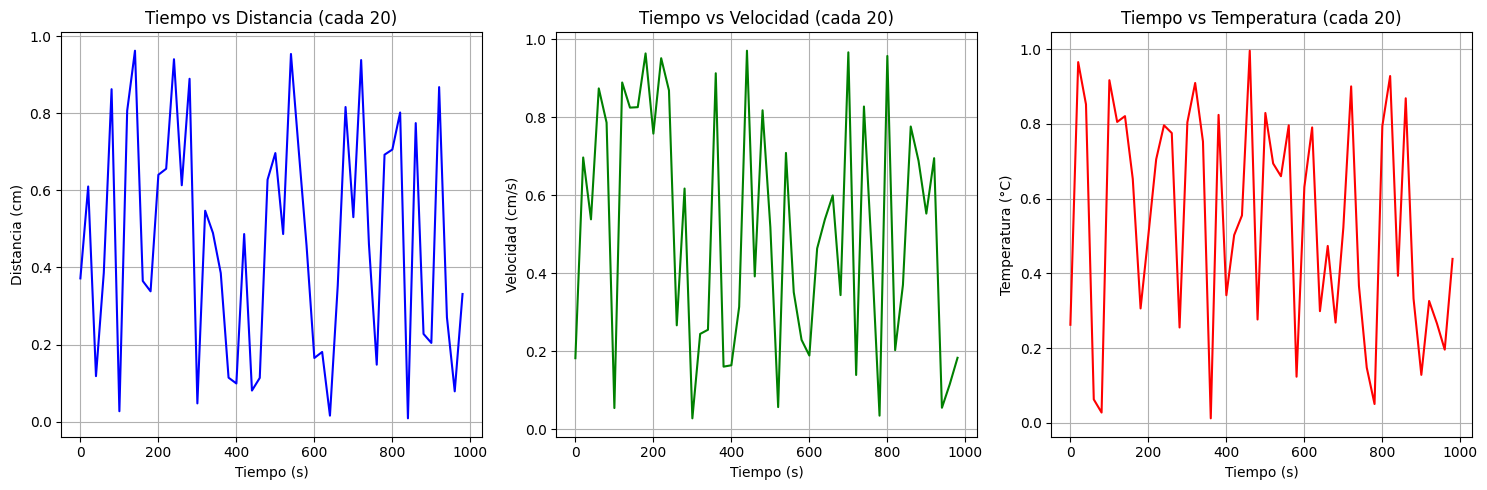

In [24]:
# Tomar 1 de cada 10 valores
df_sample = df.iloc[::20, :]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(df_sample['Tiempo (s)'], df_sample['Distancia (cm)'], 'b-')
plt.title("Tiempo vs Distancia (cada 20)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (cm)")
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(df_sample['Tiempo (s)'], df_sample['Velocidad (cm/s)'], 'g-')
plt.title("Tiempo vs Velocidad (cada 20)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(df_sample['Tiempo (s)'], df_sample['Temperatura (°C)'], 'r-')
plt.title("Tiempo vs Temperatura (cada 20)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.grid(True)

plt.tight_layout()
plt.show()
